In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


In [9]:
!python honorsproject2.py

In [2]:
import glob
all_files = glob.glob("Storing_csv_files_2" + "/*.csv")
frame = []
for filename in all_files:
    df = pd.read_csv(filename)
    frame.append(df)
original_df = pd.concat(frame)

In [3]:
len(df)

20

In [4]:
original_df

,Unnamed: 0,Summary,Issue id,Status,Assignee,Updated,Last Viewed,Original estimate,Time Spent,Custom field (Start date),...,Random_Assignee,percent_random,percent_sign,percentage,Due date,Label,percent_random_time_spent,percent_sign_time_spent,percentage_time_spent,Random_time_spent
0,0,Problem statement,10018,Done,Alexey,3/7/2022 13:12,3/7/2022 13:14,12,13.226596,2021-11-01,...,Mushu,0.420958,2,0.841916,2022-01-17,0,0.602216,2,1.204433,13.226596
1,1,Project Proposal,10019,Done,Angie,NaN,NaN,24,8.882222,2021-11-28,...,Xiao Qing,1.631317,2,3.262634,2022-02-26,0,0.610278,2,1.220555,8.882222
2,2,Assign project tasks to the team,10020,Done,Manoj,3/7/2022 13:13,3/7/2022 13:14,2,2.664339,2021-11-30,...,Frankie,0.521741,2,1.043482,2022-02-27,0,0.832170,2,1.664339,2.664339
3,3,Discuss budgeting,10021,Done,Violet,3/7/2022 13:04,3/7/2022 13:14,4,0.000000,2021-12-01,...,Alexey,1.072196,2,2.144393,2022-04-01,0,0.272547,2,0.545095,0.000000
4,4,Software Requirements Document,10022,Done,Latifah,3/7/2022 13:04,3/7/2022 13:14,48,14.929181,2021-12-02,...,Angie,0.441640,2,0.883280,2022-02-24,1,0.188975,-2,-0.377951,14.929181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,View Foreign Exchange account,10033,Done,Mulan,3/7/2022 13:07,3/7/2022 13:14,36,-46.946162,2022-03-13,...,Violet,1.026610,2,2.053221,2022-05-25,0,1.456090,2,2.912180,-46.946162
16,16,Exchange currency tab,10034,Done,Mushu,3/7/2022 12:58,3/7/2022 13:14,48,39.858745,2022-04-04,...,Mushu,0.065802,-2,-0.131603,2022-04-19,0,1.492937,2,2.985875,39.858745
17,17,User testing,10035,Done,Shang,3/7/2022 12:56,3/7/2022 13:14,8,-3.028330,2022-04-15,...,DJ,0.111901,-2,-0.223802,2022-05-12,0,1.014165,2,2.028330,-3.028330
18,18,Vendors testing the software for any bugs,10036,Done,Jisoo,3/7/2022 12:56,3/7/2022 13:14,24,23.172915,2022-04-26,...,Frankie,0.868540,2,1.737081,2022-07-03,0,0.658646,2,1.317292,23.172915


In [5]:
original_df['Status'].fillna('Done', inplace = True)
transform_df = original_df[['Status','Random_Assignee']]
print(transform_df)

encoder = OrdinalEncoder()
encoder.fit(transform_df)
final_df = encoder.transform(transform_df)
print(final_df)
#final_df = pd.DataFrame(final_df, columns = ['Status', 'Label(Binary) Project with all tasks', 'Assignee' ])
#final_df = pd.concat([final_df, original_df], axis = 1, ignore_indexing = True)
#final_df

   Status Random_Assignee
0    Done           Mushu
1    Done       Xiao Qing
2    Done         Frankie
3    Done          Alexey
4    Done           Angie
..    ...             ...
15   Done          Violet
16   Done           Mushu
17   Done              DJ
18   Done         Frankie
19   Done           Mushu

[20000 rows x 2 columns]
[[ 0. 15.]
 [ 0. 18.]
 [ 0.  6.]
 ...
 [ 0.  4.]
 [ 0.  6.]
 [ 0. 15.]]


In [6]:
original_df['diff_dates'].isnull().any().any()

False

In [7]:
original_df['diff_time_spent']

0     -1.226596
1     15.117778
2     -0.664339
3      4.000000
4     33.070819
        ...    
15    82.946162
16     8.141255
17    11.028330
18     0.827085
19    -1.910075
Name: diff_time_spent, Length: 20000, dtype: float64

In [8]:
arr = original_df[['diff_dates','percent_random', 'Original estimate', 'diff_time_spent', 'Time Spent','Label']].to_numpy()


In [9]:
dataset = np.hstack((final_df,arr))

In [10]:
dataset

array([[ 0.        , 15.        , 27.        , ..., -1.22659592,
        13.22659592,  0.        ],
       [ 0.        , 18.        , 17.        , ..., 15.11777844,
         8.88222156,  0.        ],
       [ 0.        ,  6.        , 29.        , ..., -0.66433925,
         2.66433925,  0.        ],
       ...,
       [ 0.        ,  4.        , 15.        , ..., 11.02832991,
        -3.02832991,  0.        ],
       [ 0.        ,  6.        , 18.        , ...,  0.82708486,
        23.17291514,  0.        ],
       [ 0.        , 15.        , 22.        , ..., -1.91007475,
        10.91007475,  0.        ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:6], dataset[:,-1], test_size=0.3, random_state=32)
X_train.shape

(14000, 6)

In [12]:
dict = {'Name':['Train', 'Test'], 'count' : [len(X_train), len(X_test)]}

In [13]:
dict

{'Name': ['Train', 'Test'], 'count': [14000, 6000]}

In [14]:
 countDF = pd.DataFrame(dict)

In [16]:
countDF

,Name,count
0,Train,14000
1,Test,6000


([<matplotlib.patches.Wedge at 0x225b65523a0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'Train'),
  Text(0.6465637441936392, -0.8899187180267097, 'Test')],
 [Text(-0.3526711331965305, 0.4854102098327506, '70.0%'),
  Text(0.3526711331965304, -0.48541020983275074, '30.0%')])

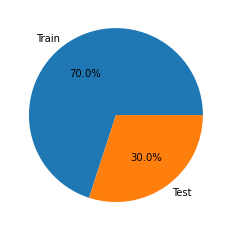

In [17]:
plt.pie(countDF['count'], labels = countDF['Name'],autopct = '%.1f%%')

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors= 2 )
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)
y_true=y_test

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true, y_testing_prediction)



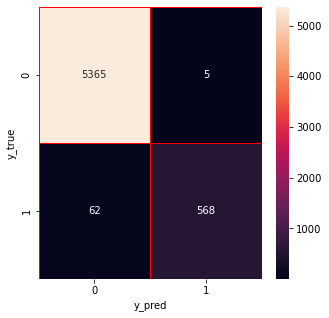

In [20]:
f, ax =plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [21]:
# Print out classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_testing_prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5370
         1.0       0.99      0.90      0.94       630

    accuracy                           0.99      6000
   macro avg       0.99      0.95      0.97      6000
weighted avg       0.99      0.99      0.99      6000



In [22]:
neigh = KNeighborsClassifier(n_neighbors= 3 )
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)


0.9896666666666667

In [23]:
neigh = KNeighborsClassifier(n_neighbors= 10)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9856666666666667

In [24]:
neigh = KNeighborsClassifier(n_neighbors= 20)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9768333333333333

In [25]:
neigh = KNeighborsClassifier(n_neighbors= 40)
neigh.fit(X_train, y_train)
y_testing_prediction = neigh.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_testing_prediction)

0.9625

In [26]:
# do another round of modeling with all of the datasets together, just to see the accuracy's improvement
#visualization would be nice as well
#Every organization runs a project. Problem there are always risks with these projects
# These issues with project management, can cost project managers  $62 million due to human error
# I am building a machine learning algorithm, that will detect the risks in projects

#on the other side of the poster:
# We created project examples in JIRA
# We can tell a story about how we cleaned up the data in python
# final output can be a spread sheet to mark which project tasks are at risk
#open up excel
# the project sample, has to show which tasks were at risk
original_df.to_csv('./Storing_csv_files_2/{}.csv')

In [27]:
sum = 0

for x in range (1, 100):
    neigh = KNeighborsClassifier(n_neighbors= x)
    neigh.fit(X_train, y_train)
    y_testing_prediction = neigh.predict(X_test)
    x = x + 1
    from sklearn.metrics import accuracy_score
    sum = sum + accuracy_score(y_test, y_testing_prediction)*100
    print("K = ",x,accuracy_score(y_test, y_testing_prediction)*100)
    avg = sum/x
print(avg)



K =  2 98.8
K =  3 98.88333333333334
K =  4 98.96666666666667
K =  5 98.8
K =  6 99.01666666666667
K =  7 98.85000000000001
K =  8 98.91666666666666
K =  9 98.68333333333334
K =  10 98.91666666666666
K =  11 98.56666666666666
K =  12 98.7
K =  13 98.46666666666667
K =  14 98.58333333333333
K =  15 98.38333333333334
K =  16 98.53333333333333
K =  17 98.08333333333333
K =  18 98.2
K =  19 97.96666666666667
K =  20 98.01666666666667
K =  21 97.68333333333334
K =  22 97.75
K =  23 97.46666666666667
K =  24 97.51666666666667
K =  25 97.33333333333334
K =  26 97.38333333333333
K =  27 97.23333333333333
K =  28 97.25
K =  29 97.11666666666666
K =  30 97.18333333333334
K =  31 96.96666666666667
K =  32 97.03333333333333
K =  33 96.86666666666667
K =  34 96.93333333333334
K =  35 96.8
K =  36 96.8
K =  37 96.6
K =  38 96.68333333333334
K =  39 96.43333333333334
K =  40 96.51666666666667
K =  41 96.25
K =  42 96.35000000000001
K =  43 96.16666666666667
K =  44 96.3
K =  45 96.11666666666666
K = 